In [2]:
# load the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Strategies based on Mean-reversion

 ### 1. Read data from a CSV file  

In [6]:
# read the csv file, change the variable type, and set the index column 
df1 = pd.read_csv('gold.csv',parse_dates=['Date'],index_col=['Date'])
df1

,XAU,GDX,GLD
Date,,,
2010-01-01,1096.3500,NaN,NaN
2010-01-04,1120.0000,47.71,109.80
2010-01-05,1118.6500,48.17,109.70
2010-01-06,1138.5000,49.34,111.51
2010-01-07,1131.9000,49.10,110.82
...,...,...,...
2019-12-26,1511.2979,29.08,142.38
2019-12-27,1510.4167,28.87,142.33
2019-12-30,1515.1230,29.49,142.63


### 2. Drop missing values 

In [9]:
# drop rows with missing values 
df1.dropna(inplace=True)
df1

,XAU,GDX,GLD
Date,,,
2010-01-04,1120.0000,47.71,109.80
2010-01-05,1118.6500,48.17,109.70
2010-01-06,1138.5000,49.34,111.51
2010-01-07,1131.9000,49.10,110.82
2010-01-08,1136.1000,49.84,111.37
...,...,...,...
2019-12-24,1498.8100,28.66,141.27
2019-12-26,1511.2979,29.08,142.38
2019-12-27,1510.4167,28.87,142.33


### 3. Create a DataFrame from a dictionary 

In [12]:
# create a data frame from a dictionary 
df2 = pd.DataFrame(data={'price': df1['GDX']})
df2

,price
Date,
2010-01-04,47.71
2010-01-05,48.17
2010-01-06,49.34
2010-01-07,49.10
2010-01-08,49.84
...,...
2019-12-24,28.66
2019-12-26,29.08
2019-12-27,28.87


### 4. Calculate log returns 

In [15]:
# log returns 
df2['return'] = np.log(df2['price'] / df2['price'].shift(1))
df2

,price,return
Date,,
2010-01-04,47.71,NaN
2010-01-05,48.17,0.009595
2010-01-06,49.34,0.023999
2010-01-07,49.10,-0.004876
2010-01-08,49.84,0.014959
...,...,...
2019-12-24,28.66,0.031546
2019-12-26,29.08,0.014548
2019-12-27,28.87,-0.007248


### 5. Calculate 25-day simple moving averages 

In [18]:
# define the trend that is the 25-day simple moving average
df2['25-day'] = df2['price'].rolling(25).mean()
df2

,price,return,25-day
Date,,,
2010-01-04,47.71,NaN,NaN
2010-01-05,48.17,0.009595,NaN
2010-01-06,49.34,0.023999,NaN
2010-01-07,49.10,-0.004876,NaN
2010-01-08,49.84,0.014959,NaN
...,...,...,...
2019-12-24,28.66,0.031546,27.2824
2019-12-26,29.08,0.014548,27.3564
2019-12-27,28.87,-0.007248,27.4176


### 6. Drop missing values 

In [21]:
# drop rows with missing values 
df2.dropna(inplace=True)
df2

,price,return,25-day
Date,,,
2010-02-08,40.78,-0.039192,45.2976
2010-02-09,42.57,0.042958,45.0920
2010-02-10,42.35,-0.005181,44.8592
2010-02-11,43.99,0.037994,44.6452
2010-02-12,43.94,-0.001137,44.4388
...,...,...,...
2019-12-24,28.66,0.031546,27.2824
2019-12-26,29.08,0.014548,27.3564
2019-12-27,28.87,-0.007248,27.4176


### 7. Calculate distance values

In [24]:
# calculate distance values between the current price and the trend (25-day moving average)
df2['distance'] = df2['price'] - df2['25-day']
df2

,price,return,25-day,distance
Date,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176
2010-02-09,42.57,0.042958,45.0920,-2.5220
2010-02-10,42.35,-0.005181,44.8592,-2.5092
2010-02-11,43.99,0.037994,44.6452,-0.6552
2010-02-12,43.94,-0.001137,44.4388,-0.4988
...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776
2019-12-26,29.08,0.014548,27.3564,1.7236
2019-12-27,28.87,-0.007248,27.4176,1.4524


### 8. Plot distance values 

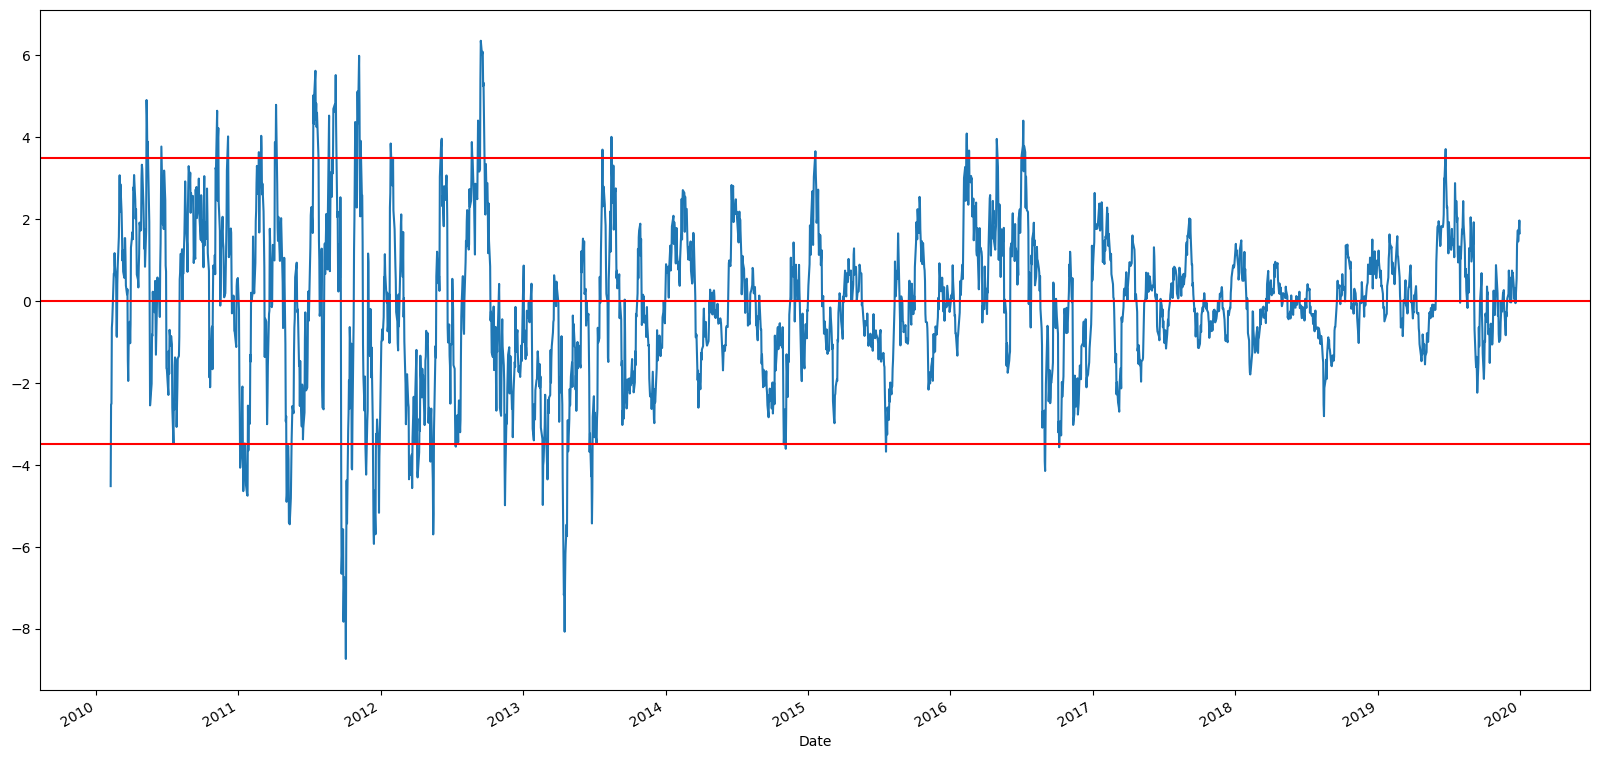

In [27]:
# plot distance values and the fixed threshold values 
df2['distance'].plot(figsize=(20, 10))
plt.axhline(y=3.5, color='r')
plt.axhline(y=-3.5, color='r')
plt.axhline(y=0, color='r');

### 9. Set long or short positions 

In [30]:
# sell signals
# go short when the distance value is greater than 3.5  
# the security has performed too well relative to its trend 
df2['position'] = np.where(df2['distance'] > 3.5, -1, np.nan)
df2

,price,return,25-day,distance,position
Date,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,NaN
2010-02-09,42.57,0.042958,45.0920,-2.5220,NaN
2010-02-10,42.35,-0.005181,44.8592,-2.5092,NaN
2010-02-11,43.99,0.037994,44.6452,-0.6552,NaN
2010-02-12,43.94,-0.001137,44.4388,-0.4988,NaN
...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,NaN
2019-12-26,29.08,0.014548,27.3564,1.7236,NaN
2019-12-27,28.87,-0.007248,27.4176,1.4524,NaN


In [32]:
# buy signals
# go long when the distance value is lower than -3.5 
# the security has performed too bad relative to its trend 
df2['position'] = np.where(df2['distance'] < -3.5, 1, df2['position'])
df2

,price,return,25-day,distance,position
Date,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,1.0
2010-02-09,42.57,0.042958,45.0920,-2.5220,NaN
2010-02-10,42.35,-0.005181,44.8592,-2.5092,NaN
2010-02-11,43.99,0.037994,44.6452,-0.6552,NaN
2010-02-12,43.94,-0.001137,44.4388,-0.4988,NaN
...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,NaN
2019-12-26,29.08,0.014548,27.3564,1.7236,NaN
2019-12-27,28.87,-0.007248,27.4176,1.4524,NaN


In [34]:
# go market neural when there is a change in the sign of the distance value 
df2['position'] = np.where(df2['distance'] * df2['distance'].shift(1) < 0, 0, df2['position'])
df2

,price,return,25-day,distance,position
Date,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,1.0
2010-02-09,42.57,0.042958,45.0920,-2.5220,NaN
2010-02-10,42.35,-0.005181,44.8592,-2.5092,NaN
2010-02-11,43.99,0.037994,44.6452,-0.6552,NaN
2010-02-12,43.94,-0.001137,44.4388,-0.4988,NaN
...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,NaN
2019-12-26,29.08,0.014548,27.3564,1.7236,NaN
2019-12-27,28.87,-0.007248,27.4176,1.4524,NaN


In [36]:
# forward fill all NaN positions with the previous non-missing values 
df2['position'] = df2['position'].ffill()
df2

,price,return,25-day,distance,position
Date,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,1.0
2010-02-09,42.57,0.042958,45.0920,-2.5220,1.0
2010-02-10,42.35,-0.005181,44.8592,-2.5092,1.0
2010-02-11,43.99,0.037994,44.6452,-0.6552,1.0
2010-02-12,43.94,-0.001137,44.4388,-0.4988,1.0
...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,0.0
2019-12-26,29.08,0.014548,27.3564,1.7236,0.0
2019-12-27,28.87,-0.007248,27.4176,1.4524,0.0


### 10. Plot positionings

In [39]:
df2['position'].value_counts()

position
 0.0    1916
 1.0     304
-1.0     272
Name: count, dtype: int64

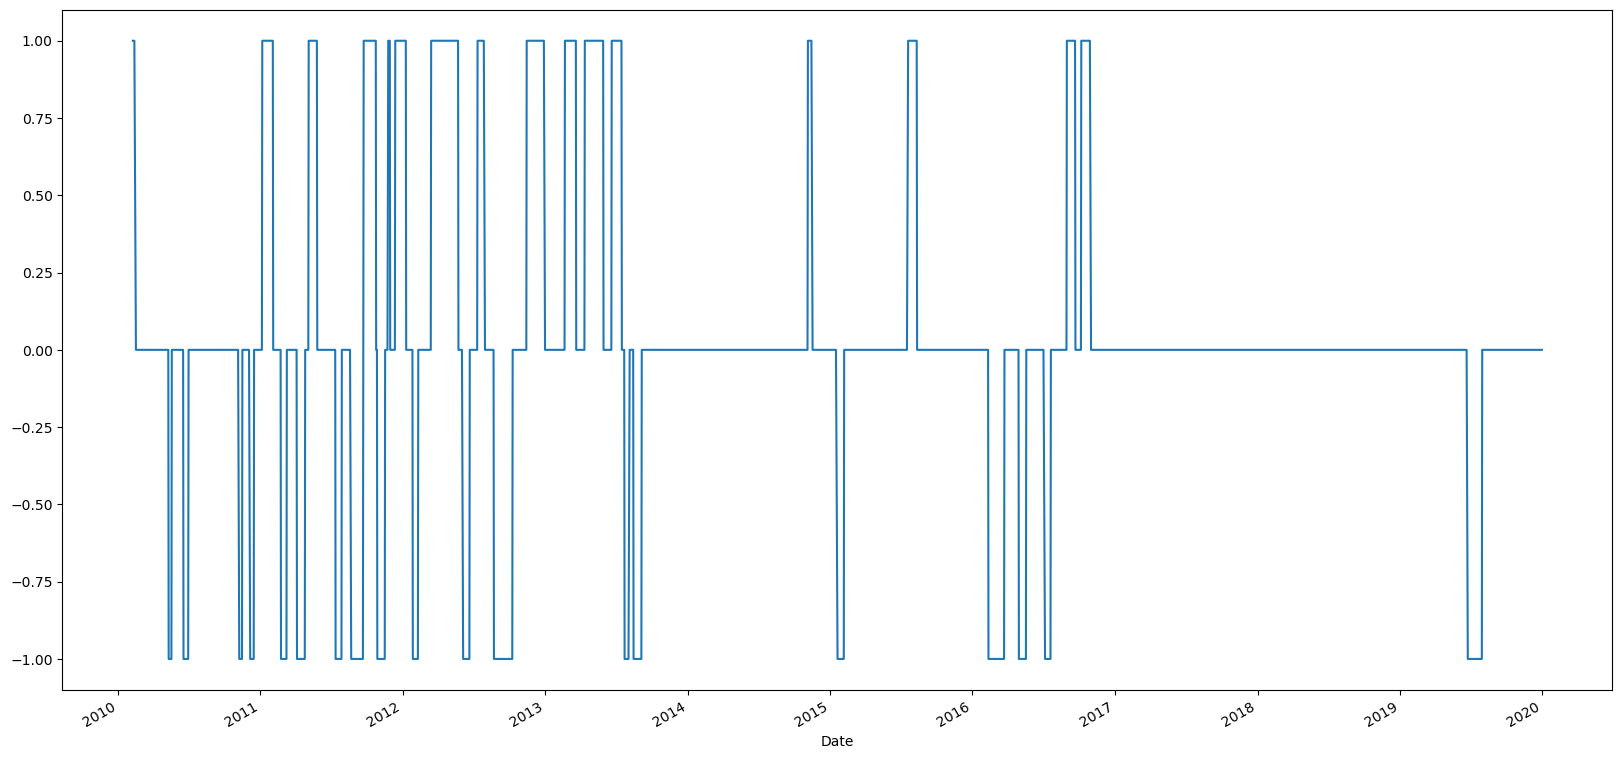

In [41]:
# plot the resulting positionings 
df2['position'].plot(figsize=(20, 10));

### 11. Calculate daily log returns based on the mean-reversion strategy 

In [44]:
# daily log returns based on the mean-reversion strategy 
df2['strategy'] = df2['position'].shift(1) * df2['return']
df2

,price,return,25-day,distance,position,strategy
Date,,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,1.0,NaN
2010-02-09,42.57,0.042958,45.0920,-2.5220,1.0,0.042958
2010-02-10,42.35,-0.005181,44.8592,-2.5092,1.0,-0.005181
2010-02-11,43.99,0.037994,44.6452,-0.6552,1.0,0.037994
2010-02-12,43.94,-0.001137,44.4388,-0.4988,1.0,-0.001137
...,...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,0.0,0.000000
2019-12-26,29.08,0.014548,27.3564,1.7236,0.0,0.000000
2019-12-27,28.87,-0.007248,27.4176,1.4524,0.0,-0.000000


### 12. Calculate cumulative log returns 

In [47]:
# cumulative returns based on the benchmark 
df2['return_cum'] = df2['return'].cumsum().apply(np.exp).sub(1)
df2

,price,return,25-day,distance,position,strategy,return_cum
Date,,,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,1.0,NaN,-0.038434
2010-02-09,42.57,0.042958,45.0920,-2.5220,1.0,0.042958,0.003773
2010-02-10,42.35,-0.005181,44.8592,-2.5092,1.0,-0.005181,-0.001415
2010-02-11,43.99,0.037994,44.6452,-0.6552,1.0,0.037994,0.037255
2010-02-12,43.94,-0.001137,44.4388,-0.4988,1.0,-0.001137,0.036076
...,...,...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,0.0,0.000000,-0.324216
2019-12-26,29.08,0.014548,27.3564,1.7236,0.0,0.000000,-0.314313
2019-12-27,28.87,-0.007248,27.4176,1.4524,0.0,-0.000000,-0.319264


In [49]:
# cumulative returns based on the mean-reversion strategy 
df2['strategy_cum'] = df2['strategy'].cumsum().apply(np.exp).sub(1)
df2

,price,return,25-day,distance,position,strategy,return_cum,strategy_cum
Date,,,,,,,,
2010-02-08,40.78,-0.039192,45.2976,-4.5176,1.0,NaN,-0.038434,NaN
2010-02-09,42.57,0.042958,45.0920,-2.5220,1.0,0.042958,0.003773,0.043894
2010-02-10,42.35,-0.005181,44.8592,-2.5092,1.0,-0.005181,-0.001415,0.038499
2010-02-11,43.99,0.037994,44.6452,-0.6552,1.0,0.037994,0.037255,0.078715
2010-02-12,43.94,-0.001137,44.4388,-0.4988,1.0,-0.001137,0.036076,0.077489
...,...,...,...,...,...,...,...,...
2019-12-24,28.66,0.031546,27.2824,1.3776,0.0,0.000000,-0.324216,3.501657
2019-12-26,29.08,0.014548,27.3564,1.7236,0.0,0.000000,-0.314313,3.501657
2019-12-27,28.87,-0.007248,27.4176,1.4524,0.0,-0.000000,-0.319264,3.501657


### 13. Plot cumulative log returns

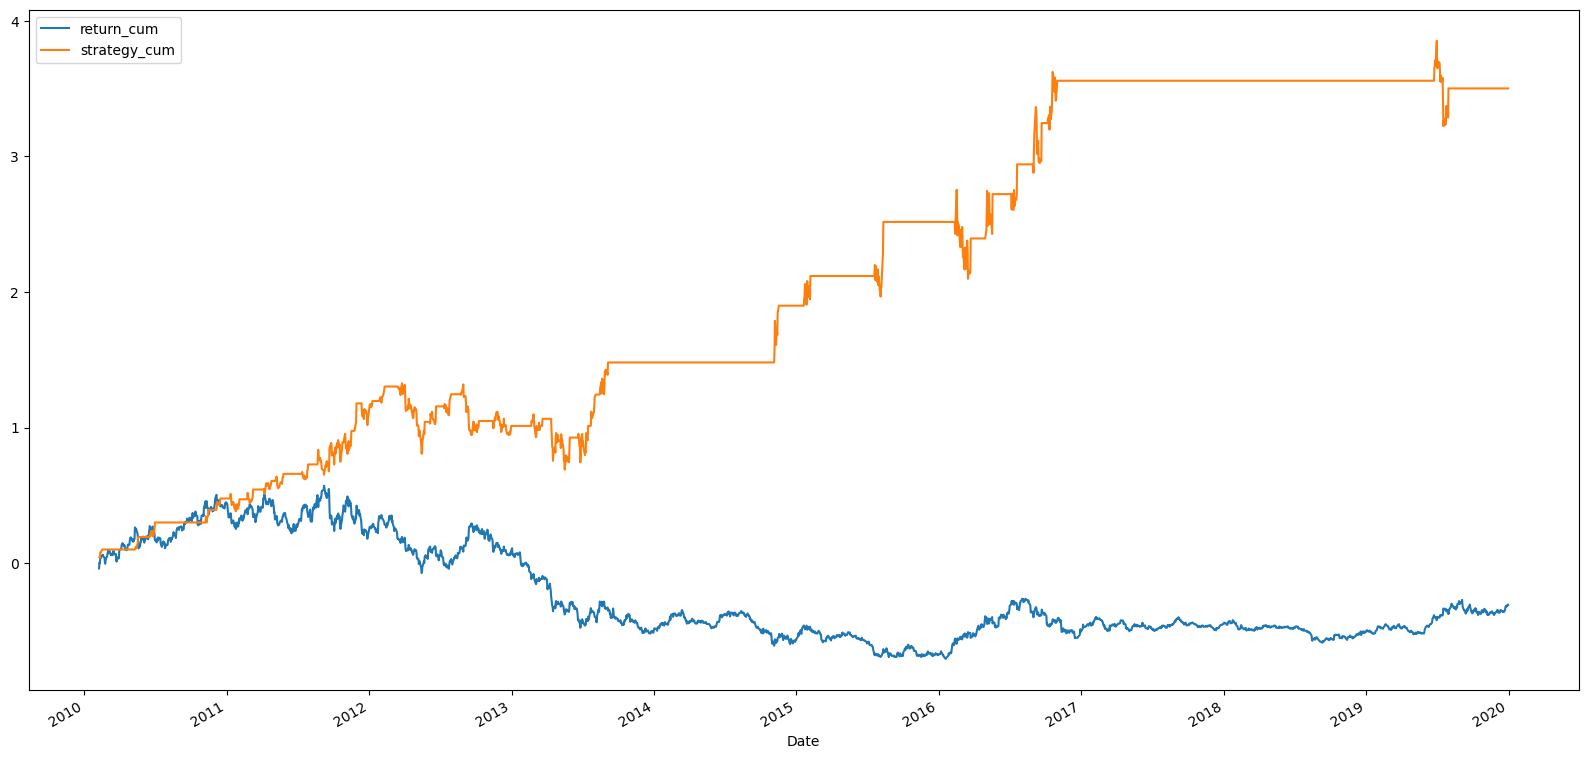

In [52]:
# cumulative returns based on the benchmark and the strategy 
df2[['return_cum','strategy_cum']].plot(figsize=(20, 10))
plt.show()

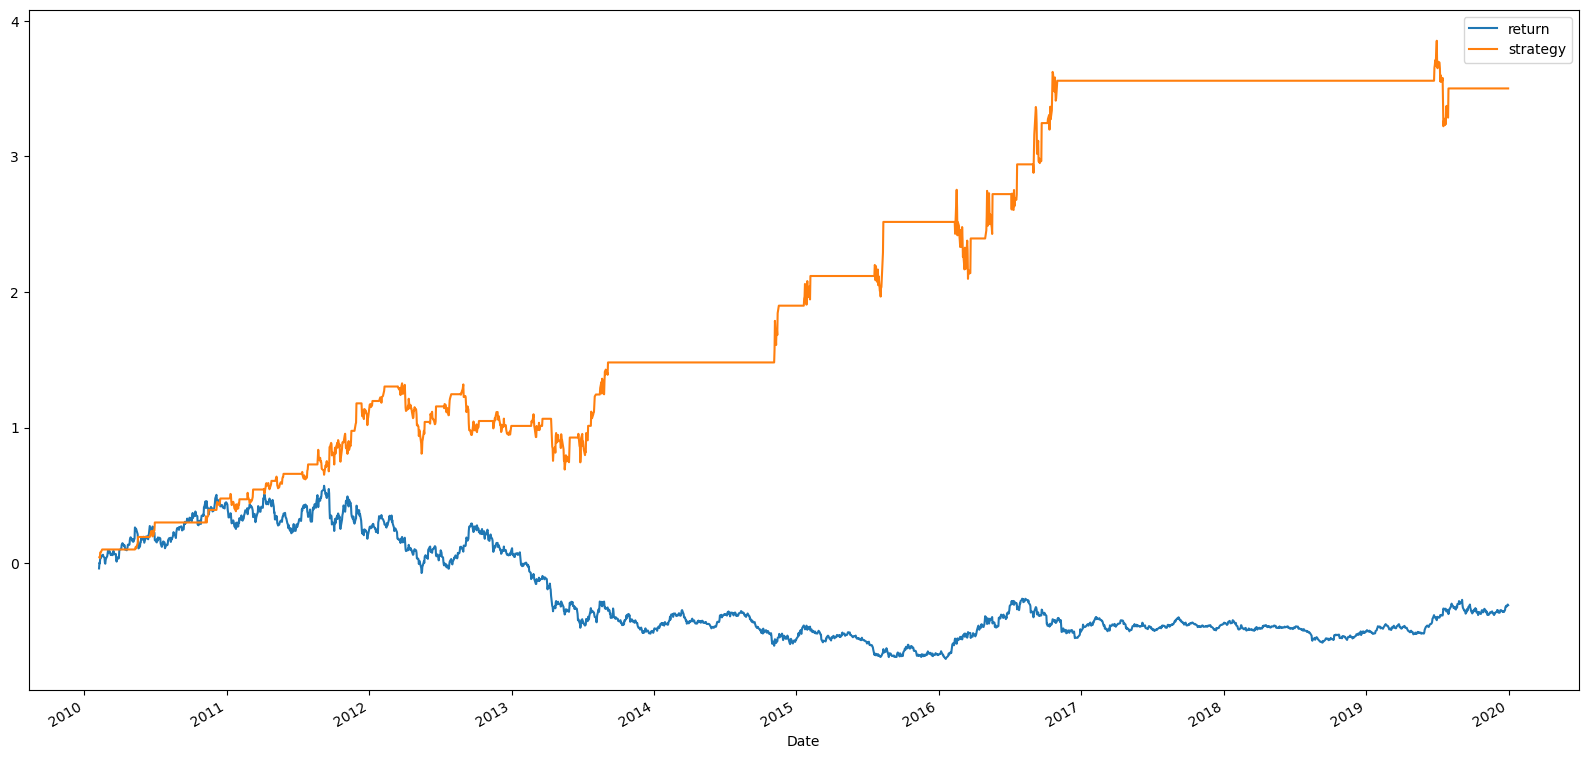

In [53]:
# cumulative returns based on the benchmark and the strategy 
df2[['return', 'strategy']].cumsum().apply(np.exp).sub(1).plot(figsize=(20, 10))
plt.show()

### 14. Compare investment results

In [57]:
# last cumulative returns 
df2.iloc[-1]

price           29.280000
return          -0.007147
25-day          27.625200
distance         1.654800
position         0.000000
strategy        -0.000000
return_cum      -0.309597
strategy_cum     3.501657
Name: 2019-12-31 00:00:00, dtype: float64

In [59]:
# sum up the log returns for the benchmark 
np.exp(df2['return'].sum())-1

-0.3095967932091499

In [61]:
# sum up the log returns for the strategy 
np.exp(df2['strategy'].sum())-1

3.501656697797544